In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Units: s/byte (stream benchmark)
T_copy = 1/(12600*1024*1024)

# Function that takes the number of points as argument and returns the time it takes to send AND recv that many
def T_MPI_sendrecv(x):
    if x < 500:
        return (-0.032634*x+16.863389)/1000
    else:
        return (0.0000028207*x*x-0.0017901971*x+0.8430655245)/1000
    

In [10]:
# L, R, T, B
halo = [1,1,1,1]

# latency (for MPI, etc)
latency = 8

In [11]:
myrange = range(100,2000,100)

T_1000 = []
for i in myrange:
    num_halo = 8*( (halo[0]+halo[1]+halo[2]+halo[3])*i )
    T_1000 += [(latency + 1000*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy))]

In [12]:
x_exp = [2857, 3333, 4000, 5000, 6667, 10000]
T_exp_1000 = np.array([295.133, 362.348, 412.814, 487.59, 578.26, 592.147])

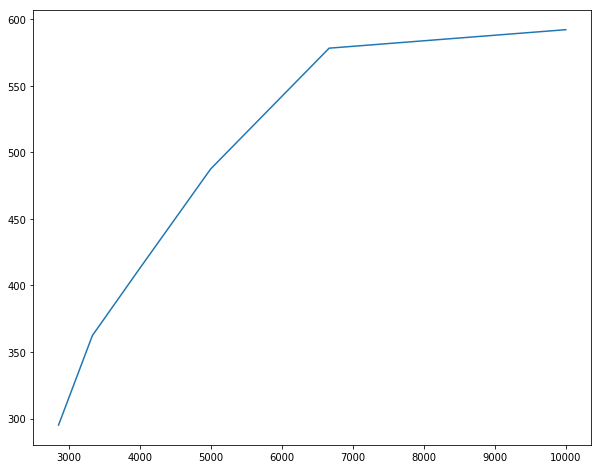

In [13]:
plt.figure(figsize=(10,8))
plt.plot(x_exp, T_exp_1000)

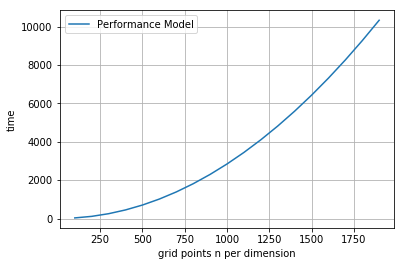

In [16]:

#plt.figure(figsize=(10,8))
plt.plot(myrange,T_1000, label="Performance Model");
#plt.plot(x_exp, T_exp_100, 'o-', label="Experiments")

plt.legend()
plt.ylabel('time');
plt.grid()
plt.xlabel('grid points n per dimension');
#plt.savefig("performance_dimension.pdf", bbox_inches='tight')

In [ ]:
x_np_exp = np.array([4, 9, 16, 25])
T_np_exp = np.array([402.679, 417.754, 418.599, 425.894])/1000

num_halo = 8*( (halo[0]+halo[1]+halo[2]+halo[3])*5000 )
T_np = latency + 1000*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)

In [ ]:
f = plt.figure()

line1, = plt.plot(x_np_exp, T_np_exp, 'o-', label="Experiments")
line2, = plt.plot(x_np_exp, [T_np, T_np, T_np, T_np], label="Performance Model")

plt.legend(handles=[line1, line2], loc=2)
plt.ylabel('time')
plt.grid()
plt.xlabel('\# of processes')

f.savefig("performance_processes.pdf", bbox_inches='tight')